In [34]:
import numpy as np
from astropy.io import fits
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'
cmap='viridis'

Populating the interactive namespace from numpy and matplotlib


In [35]:
%ls

1E-7/                               OS5_SIM_2.0_t10000/
1E-8/                               OS5_SIM_2.0_t2000/
5E-7/                               PISCES/
5E-8/                               Starcam_Right_Mask.ipynb
BB_red_lstsq.fits                   Traps/
BB_red_lstsq_resid.fits             WFIRST/
Calibra_170407_data/                charis-dep/
ConstructFITSImagesForVideos.ipynb  charis-dep_old/
Detector-traps/                     charis_data/
Flat637_red_lstsq.fits              crispy/
Flat637_red_lstsq_resid.fits        oldTraps/
IFS-Simulator2/                     quicklook/
IFS-postprocess/                    quicklook_old/
Non-telecentric/                    test.aux*
OS5/                                test.log*
OS5_RDI_660_1.6/                    test.pdf*
OS5_RDI_660_1.8/                    test.synctex.gz*
OS5_RDI_660_2.0/                    test.tex*
OS5_RDI_660_2.2/                    webbpsf/
OS5_SIM_2.0_noiseless/              webbpsf-data/
OS5_SIM_2.0_t1000/          

In [36]:
folder = 'OS5/target_only/'

In [37]:
import glob
files = glob.glob(folder+"*")
print len(files)

100


In [38]:
first = fits.getdata(files[0])
print first.shape
cutY = 80
cutX = 50
slicenum = 5
firstcropped = first[slicenum,cutY:-cutY,cutX:-cutX]

(45, 315, 315)


(-0.5, 214.5, -0.5, 154.5)

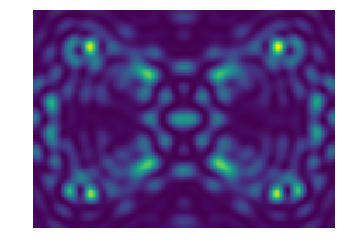

In [39]:
plt.imshow(firstcropped)
plt.axis('off')

In [40]:
a,b = firstcropped.shape
print a,b

155 215


In [41]:
img = np.zeros((2*a,2*b))
img[:a,:b] = firstcropped
img[:a,b:] = first[15,cutY:-cutY,cutX:-cutX]
img[a:,:b] = first[25,cutY:-cutY,cutX:-cutX]
img[a:,b:] = first[35,cutY:-cutY,cutX:-cutX]


(-0.5, 429.5, -0.5, 309.5)

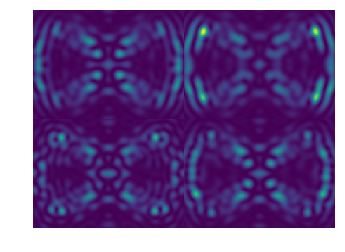

In [42]:
plt.imshow(img)
plt.axis('off')

In [43]:
out = fits.HDUList(fits.PrimaryHDU(img))
out.writeto('OS5/output_video/test.fits')

In [47]:
for i in range(len(files)):
    f = files[i]
    print f
    # create new array
    img = np.zeros((2*a,2*b))
    data = fits.getdata(f)
    img[:a,:b] = data[5,cutY:-cutY,cutX:-cutX]
    img[:a,b:] = data[15,cutY:-cutY,cutX:-cutX]
    img[a:,:b] = data[25,cutY:-cutY,cutX:-cutX]
    img[a:,b:] = data[35,cutY:-cutY,cutX:-cutX]
    out = fits.HDUList(fits.PrimaryHDU(img))
    out.writeto('OS5/output_video/video_%d.fits' % i,clobber=True)

OS5/target_only/os5_spc_031.fits
OS5/target_only/os5_spc_032.fits
OS5/target_only/os5_spc_033.fits
OS5/target_only/os5_spc_034.fits
OS5/target_only/os5_spc_035.fits
OS5/target_only/os5_spc_036.fits
OS5/target_only/os5_spc_037.fits
OS5/target_only/os5_spc_038.fits
OS5/target_only/os5_spc_039.fits
OS5/target_only/os5_spc_040.fits
OS5/target_only/os5_spc_041.fits
OS5/target_only/os5_spc_042.fits
OS5/target_only/os5_spc_043.fits
OS5/target_only/os5_spc_044.fits
OS5/target_only/os5_spc_045.fits
OS5/target_only/os5_spc_046.fits
OS5/target_only/os5_spc_047.fits
OS5/target_only/os5_spc_048.fits
OS5/target_only/os5_spc_049.fits
OS5/target_only/os5_spc_050.fits
OS5/target_only/os5_spc_051.fits
OS5/target_only/os5_spc_052.fits
OS5/target_only/os5_spc_053.fits
OS5/target_only/os5_spc_054.fits
OS5/target_only/os5_spc_055.fits
OS5/target_only/os5_spc_056.fits
OS5/target_only/os5_spc_057.fits
OS5/target_only/os5_spc_058.fits
OS5/target_only/os5_spc_059.fits
OS5/target_only/os5_spc_060.fits
OS5/target

In [50]:
arr = 660.*np.linspace(1.-0.18/2.,1.+0.18/2.,45)

In [51]:
arr[5],arr[15],arr[25],arr[35]

(614.10000000000002,
 641.10000000000002,
 668.10000000000014,
 695.10000000000002)

# Video of integrated IFS map

In [76]:
import sys
folder = 'crispy'
print(folder)
if folder not in sys.path: sys.path.append(folder)

from crispy.params import Params
folder = 'crispy/crispy'
par = Params(folder)


crispy


In [77]:
par.hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
COMMENT                                                                         
COMMENT ************************************************************            
COMMENT ********************** General parameters ******************            
COMMENT ************************************************************            
COMMENT                                                                         
NLENS   =                  108 / # lenslets across array                        
PITCH   =             0.000174 / Lenslet pitch (meters)                         
INTERLAC=                    2 / Interlacing                                    
PHILENS =    26.565051177077

In [78]:
from crispy.tools.detector import readDetector
from crispy.tools.image import Image
from crispy.IFS import reduceIFSMap
par.nonoise=False
sampling=2.0
par.timeframe=1000
par.Nreads = par.timeframe/300
par.PCmode=True
# par.EMStats=True
# par.poisson=True
# par.RN=0.0
# par.PCbias=0.0
# par.EMGain = 200.0
# par.lifefraction = 0.0
par.lenslet_sampling=1./sampling
folder = '/Users/mrizzo/IFS/OS5_SIM_'+str(sampling)+'_t'+str(int(par.timeframe))



In [79]:
rateFiles = glob.glob(folder+"/*.fits")[30:]
print len(rateFiles)

100


In [81]:
outmap = np.zeros((1024,1024))
# load offaxis map
offaxis = fits.getdata(folder+'/average/offaxis_planet.fits')
inttime = par.timeframe/par.Nreads
print inttime
s = 0
trim=30
for i in range(len(rateFiles)):
    rateFile = rateFiles[i]
    img = Image(rateFile)
    img.data += offaxis
    for j in range(par.Nreads):
        outmap += readDetector(par,img,inttime=inttime)
        s += 1
    red = reduceIFSMap(par,outmap/np.float(s),smoothbad=False)
#     out = fits.HDUList(fits.PrimaryHDU(outmap/np.float(s)))
#     out.writeto('OS5/output_video/ramp_%d.fits' % i, clobber=True)
    c,d = red.data[1,trim:-trim,trim:-trim].shape
    outIFS = np.zeros((2*c,2*d))
    outIFS[:c,:d] = red.data[1,trim:-trim,trim:-trim]
    outIFS[:c,d:] = red.data[6,trim:-trim,trim:-trim]
    outIFS[c:,:d] = red.data[11,trim:-trim,trim:-trim]
    outIFS[c:,d:] = red.data[-4,trim:-trim,trim:-trim]
    out = fits.HDUList(fits.PrimaryHDU(outIFS))
    out.writeto('OS5/output_video/rampIFS_%d.fits' % i, clobber=True)



333
crispy - INFO - Read data from HDU 1 of /Users/mrizzo/IFS/OS5_SIM_2.0_t1000/os5_spc_031_targetstar_IFS.fits
crispy - INFO - Reduced cube will have 19 wavelength bins
crispy - INFO - Writing data to crispy/crispy/SimResults/20170622-173545_red_optext.fits
crispy - INFO - Elapsed time: 1.249526s
crispy - INFO - Read data from HDU 1 of /Users/mrizzo/IFS/OS5_SIM_2.0_t1000/os5_spc_032_targetstar_IFS.fits
crispy - INFO - Reduced cube will have 19 wavelength bins
crispy - INFO - Writing data to crispy/crispy/SimResults/20170622-173547_red_optext.fits
crispy - INFO - Elapsed time: 1.235427s
crispy - INFO - Read data from HDU 1 of /Users/mrizzo/IFS/OS5_SIM_2.0_t1000/os5_spc_033_targetstar_IFS.fits
crispy - INFO - Reduced cube will have 19 wavelength bins
crispy - INFO - Writing data to crispy/crispy/SimResults/20170622-173548_red_optext.fits
crispy - INFO - Elapsed time: 1.227653s
crispy - INFO - Read data from HDU 1 of /Users/mrizzo/IFS/OS5_SIM_2.0_t1000/os5_spc_034_targetstar_IFS.fits
cri

In [82]:
print c,d

48 48
